In [6]:
import numpy as np
import scipy as sp
import scipy.stats as stat

def call_value(S, T, sigma, r, K):
    if T == 0:
        return np.maximum(S - K, 0)
    d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    d2 = ((np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    value = (S * stat.norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * stat.norm.cdf(d2, 0, 1))
    return value

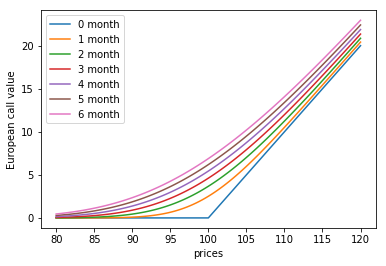

In [7]:
import matplotlib.pyplot as plt

r = 0.05
sigma = 0.20
K = 100

maturities = np.linspace(0, 0.5, 7)
prices = np.linspace(80, 120, 101)
T, S = np.meshgrid(maturities, prices)
V = np.zeros_like(S)
for i, s in enumerate(prices):
    for j, t in enumerate(maturities):
        V[i, j] = call_value(s, t, sigma, r, K)

plt.plot(prices, V)
plt.xlabel('prices')
plt.ylabel('European call value')
plt.legend(["%d month" % i for i in range(13)], loc=2)
plt.show()

In [16]:
def call_theta(S, T, sigma, r, K):
    d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    d2 = ((np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    theta = -(S * sigma * sp.stats.norm.pdf(d1, 0, 1)/(2 * np.sqrt(T)) - r * K * np.exp(-r * T) * stat.norm.cdf(d2, 0, 1))
    return theta

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWa

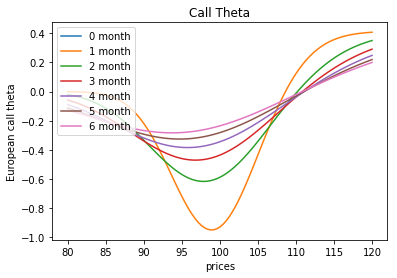

In [17]:
r = 0.05
sigma = 0.20
K = 100

maturities = np.linspace(0, 0.5, 7)
prices = np.linspace(80, 120, 101)
T, S = np.meshgrid(maturities, prices)
X = np.zeros_like(S)
for i, s in enumerate(prices):
    for j, t in enumerate(maturities):
        X[i, j] = call_theta(s, t, sigma, r, K) / 12.0

plt.plot(prices, X)
plt.title("Call Theta")
plt.xlabel('prices')
plt.ylabel('European call theta')
plt.legend(["%d month" % i for i in range(13)], loc=2)
plt.show()

In [19]:
def call_delta(S, T, sigma, r, K):
    if T == 0:
        return int(S > K)
    d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    delta = sp.stats.norm.cdf(d1, 0, 1)
    return delta

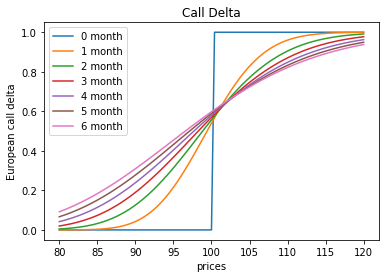

In [20]:
r = 0.05
sigma = 0.20
K = 100

maturities = np.linspace(0, 0.5, 7)
prices = np.linspace(80, 120, 101)
T, S = np.meshgrid(maturities, prices)
X = np.zeros_like(S)
for i, s in enumerate(prices):
    for j, t in enumerate(maturities):
        X[i, j] = call_delta(s, t, sigma, r, K)

plt.plot(prices, X)
plt.title("Call Delta")
plt.xlabel('prices')
plt.ylabel('European call delta')
plt.legend(["%d month" % i for i in range(13)], loc=2)
plt.show()

In [21]:
def call_vega(S, T, sigma, r, K):
    if T == 0:
        return 0
    d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    vega = S * sp.stats.norm.pdf(d1, 0, 1) * np.sqrt(T)
    return vega

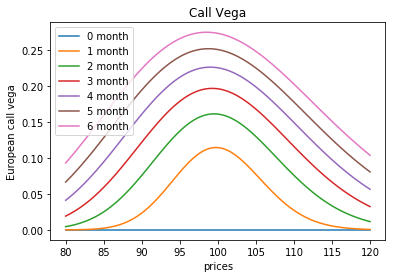

In [22]:
r = 0.05
sigma = 0.20
K = 100

maturities = np.linspace(0, 0.5, 7)
prices = np.linspace(80, 120, 101)
T, S = np.meshgrid(maturities, prices)
X = np.zeros_like(S)
for i, s in enumerate(prices):
    for j, t in enumerate(maturities):
        X[i, j] = call_vega(s, t, sigma, r, K) * 0.01

plt.plot(prices, X)
plt.title("Call Vega")
plt.xlabel('prices')
plt.ylabel('European call vega')
plt.legend(["%d month" % i for i in range(13)], loc=2)
plt.show()

In [23]:
def call_rho(S, T, sigma, r, K):
    d2 = ((np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    rho = K * T * np.exp(-r * T) * sp.stats.norm.cdf(d2, 0, 1)
    return rho

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


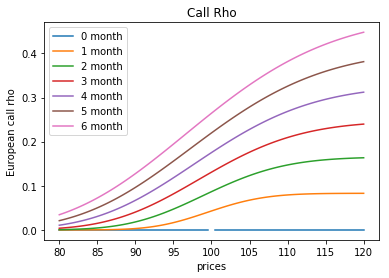

In [24]:
r = 0.05
sigma = 0.20
K = 100

maturities = np.linspace(0, 0.5, 7)
prices = np.linspace(80, 120, 101)
T, S = np.meshgrid(maturities, prices)
X = np.zeros_like(S)
for i, s in enumerate(prices):
    for j, t in enumerate(maturities):
        X[i, j] = call_rho(s, t, sigma, r, K) * 0.01

plt.plot(prices, X)
plt.title("Call Rho")
plt.xlabel('prices')
plt.ylabel('European call rho')
plt.legend(["%d month" % i for i in range(13)], loc=2)
plt.show()

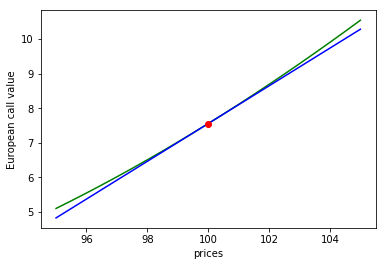

In [25]:
r = 0.05
sigma = 0.04 * np.sqrt(256)  # 0.64 or 64% pa
K = 100
T = 1/12.0

prices = np.linspace(95, 105, 21)
values = np.zeros_like(prices)
for i, s in enumerate(prices):
    values[i] = call_value(s, T, sigma, r, K)

s0 = 100
v0 = call_value(s0, T, sigma, r, K)
d0 = call_delta(s0, T, sigma, r, K)

plt.plot(prices, values, 'g-')
plt.plot(prices, (prices - s0)* d0 + v0, 'b-')
plt.plot(s0, v0, 'ro')
plt.xlabel('prices')
plt.ylabel('European call value')
plt.show()

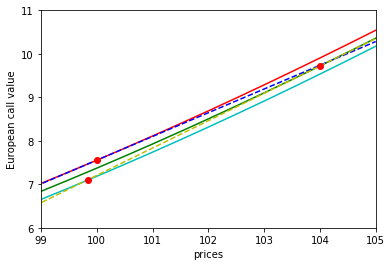

In [31]:
T1 = 1/12.0 - 1 * 1/256
T2 = 1/12.0 - 2 * 1/256

prices = np.linspace(95, 105, 21)
values1 = np.zeros_like(prices)
values2 = np.zeros_like(prices)
for i, s in enumerate(prices):
    values1[i] = call_value(s, T1, sigma, r, K)
    values2[i] = call_value(s, T2, sigma, r, K)

s1 = s0 + sigma * np.sqrt(1/256) * s0
v1 = call_value(s1, T1, sigma, r, K)
d1 = call_delta(s1, T1, sigma, r, K)
s2 = s1 - sigma * np.sqrt(1/256) * s1
v2 = call_value(s2, T2, sigma, r, K)

plt.plot(prices, values, 'r-')
plt.plot(prices, values1, 'g-')
plt.plot(prices, values2, 'c-')
plt.plot(prices, (prices - s0)* d0 + v0, 'b--')
plt.plot(prices, (prices - s1)* d1 + v1, 'y--')
plt.plot(s0, v0, 'ro')
plt.plot(s1, v1, 'ro')
plt.plot(s2, v2, 'ro')
plt.xlabel('prices')
plt.ylabel('European call value')
plt.xlim([99, 105])
plt.ylim([6, 11])
plt.show()

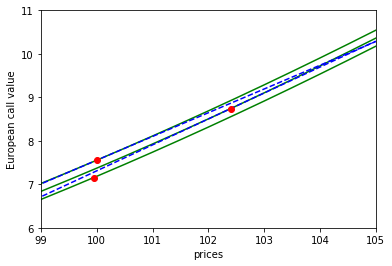

In [32]:
new_sigma = sigma * 0.6

s1 = s0 + new_sigma * np.sqrt(1/256) * s0
v1 = call_value(s1, T1, sigma, r, K)
d1 = call_delta(s1, T1, sigma, r, K)
s2 = s1 - new_sigma * np.sqrt(1/256) * s1
v2 = call_value(s2, T2, sigma, r, K)

plt.plot(prices, values, 'g-')
plt.plot(prices, values1, 'g-')
plt.plot(prices, values2, 'g-')
plt.plot(prices, (prices - s0)* d0 + v0, 'b--')
plt.plot(prices, (prices - s1)* d1 + v1, 'b--')
plt.plot(s0, v0, 'ro')
plt.plot(s1, v1, 'ro')
plt.plot(s2, v2, 'ro')
plt.xlabel('prices')
plt.ylabel('European call value')
plt.xlim([99, 105])
plt.ylim([6, 11])
plt.show()

In [33]:
S0 = 10000
M = 256
r = 0.05
sigma = 0.40
T = 1

In [34]:
def stockprice_simulation(S0, T, sigma, r, M, seed=None):
    if isinstance(sigma, np.ndarray):
        if len(sigma) >= M:
            sigma_vec = sigma[:M]
        else:
            raise ValueError("dimension error!")
    else:
        sigma_vec = sigma * np.ones(M + 1)
    if seed is not None:
        np.random.seed(seed)
    dt = T / M
    T_vec = np.linspace(T, 0, M + 1)
    S_vec = np.zeros(M + 1)
    S_vec[0] = S0
    for t in range(1, M + 1):
        S_vec[t] = S_vec[t - 1] * np.exp((r - 0.5 * sigma_vec[t - 1] ** 2) * dt 
                 + sigma_vec[t - 1] * np.sqrt(dt) * np.random.standard_normal())
    S_vec = np.around(S_vec)
    return S_vec.T, T_vec, sigma_vec

In [35]:
S_vec, T_vec, sigma_vec = stockprice_simulation(S0, T, sigma, r, M, seed=3)

In [36]:
K = 10000
NomialAmount = 10

In [38]:
def call_value(S, T, sigma, r, K):
    if not hasattr(T, "__len__") and T == 0:
        return np.maximum(S - K, 0)
    d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    d2 = ((np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    value = (S * sp.stats.norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * sp.stats.norm.cdf(d2, 0, 1))
    return value

In [39]:
def call_delta(S, T, sigma, r, K):
    if not hasattr(T, "__len__") and T == 0:
        return int(S > K)
    d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    delta = sp.stats.norm.cdf(d1, 0, 1)
    return delta

In [40]:
V_vec = NomialAmount * call_value(S_vec, T_vec, sigma_vec, r, K)
D_vec = NomialAmount * call_delta(S_vec, T_vec, sigma_vec, r, K)

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


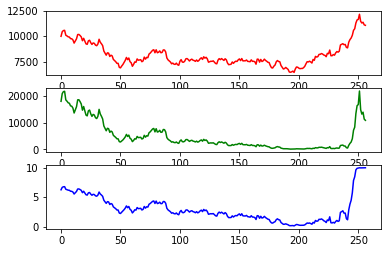

In [41]:
plt.subplot(311)
plt.plot(S_vec, 'r-')
plt.subplot(312)
plt.plot(V_vec, 'g-')
plt.subplot(313)
plt.plot(D_vec, 'b-')
plt.show()

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


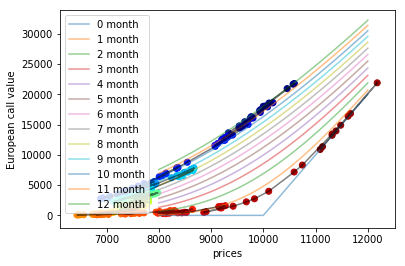

In [44]:
import matplotlib as mpl

maturities = np.linspace(0, 1, 13)
prices = np.linspace(8000, 12000, 101)
_T, S = np.meshgrid(maturities, prices)
V = np.zeros_like(S)
for i, s in enumerate(prices):
    for j, t in enumerate(maturities):
        V[i, j] = NomialAmount * call_value(s, t, sigma, r, K)

plt.plot(prices, V, alpha=0.5)
plt.xlabel('prices')
plt.ylabel('European call value')
plt.legend(["%d month" % i for i in range(13)], loc=2)
plt.hold(True)
plt.scatter(S_vec, V_vec, c=T_vec, cmap=mpl.cm.jet_r)
plt.plot(S_vec, V_vec, c="k", alpha=0.5)
plt.show()

In [45]:
import matplotlib as mpl

maturities = np.linspace(0, 1, 13)
prices = np.linspace(8000, 12000, 101)
_T, S = np.meshgrid(maturities, prices)
V = np.zeros_like(S)
for i, s in enumerate(prices):
    for j, t in enumerate(maturities):
        V[i, j] = NomialAmount * call_value(s, t, sigma, r, K)

In [49]:
import pandas as pd

def deltahedge_backtest(price, value, delta, time, option_price=None):
    dtime = -np.diff(T_vec)
    if option_price  is None:
        option_price = V_vec[0]

    position = np.around(delta)
    gamma = np.concatenate([position[:1], np.diff(position)]) 
    cashflow = -gamma * price
    cashflow[0] += option_price
    cash = np.zeros_like(cashflow)
    cash[0] = cashflow[0]
    for i, (cf, dt) in enumerate(zip(cashflow[1:], dtime)):
        cash[i + 1] = np.around(cash[i] * np.exp(r * dt) + cf)
    stockvalue = position * price
    totalvalue = cash + stockvalue
    profit = totalvalue - value
    
    df = pd.DataFrame({"time":time, "stock price":price, "option value": value, "option delta": delta, 
                       "position": position, "cash flow": cashflow, "cash": cash, "stock value": stockvalue, 
                       "total": totalvalue, "profit": profit},
                     columns=["time", "stock price", "option value", "option delta", "position",
                             "cash flow", "cash", "stock value", "total", "profit"])
    return df

In [50]:
df = deltahedge_backtest(S_vec, V_vec, D_vec, T_vec)

In [51]:
df.tail()

,time,stock price,option value,option delta,position,cash flow,cash,stock value,total,profit
252,0.015625,11481.0,14892.483774,9.974669,10.0,-0.0,-101132.0,114810.0,13678.0,-1214.483774
253,0.011719,11317.0,13231.333939,9.980884,10.0,-0.0,-101152.0,113170.0,12018.0,-1213.333939
254,0.007812,11391.0,13949.154808,9.998974,10.0,-0.0,-101172.0,113910.0,12738.0,-1211.154808
255,0.003906,11133.0,11349.534104,9.999920,10.0,-0.0,-101192.0,111330.0,10138.0,-1211.534104
256,0.000000,11089.0,10890.000000,10.000000,10.0,-0.0,-101212.0,110890.0,9678.0,-1212.000000


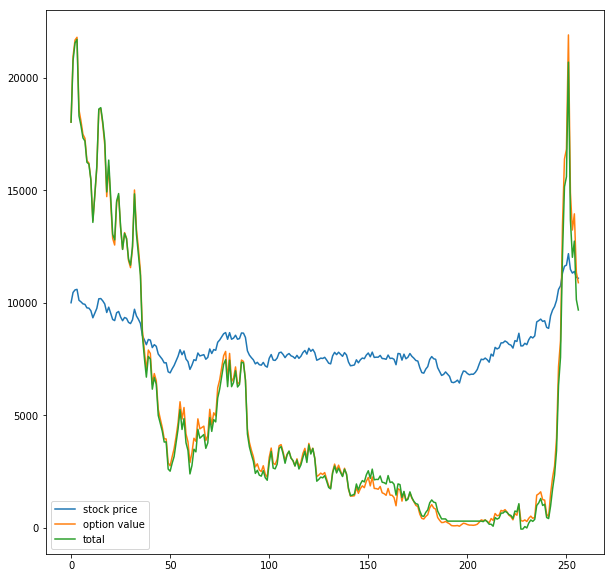

In [52]:
df1 = df[["stock price", "option value", "total"]]
df1.plot(figsize=(10, 10))
plt.show()

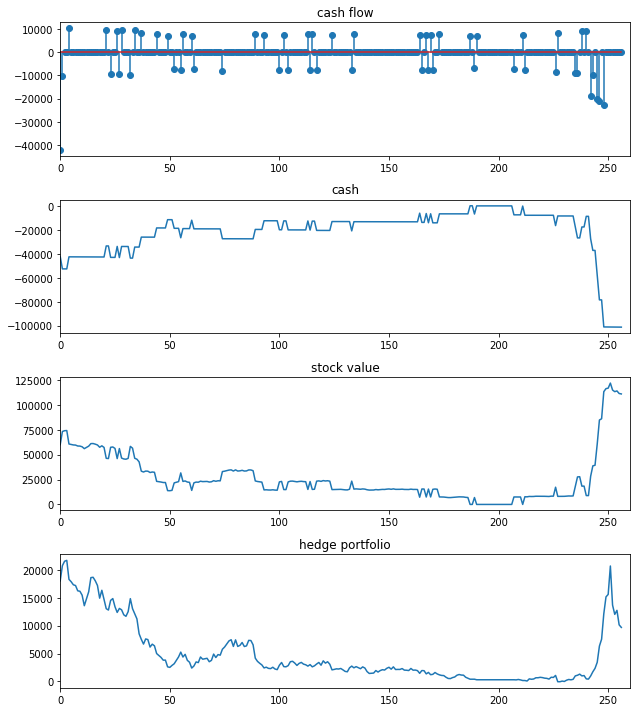

In [53]:
plt.figure(figsize=(9, 10))
plt.subplot(411)
plt.stem(df[["cash flow"]])
plt.title("cash flow")
plt.xlim(0, 260)
plt.subplot(412)
plt.plot(df[["cash"]])
plt.title("cash")
plt.xlim(0, 260)
plt.subplot(413)
plt.plot(df[["stock value"]])
plt.title("stock value")
plt.xlim(0, 260)
plt.subplot(414)
plt.plot(df[["total"]])
plt.title("hedge portfolio")
plt.xlim(0, 260)
plt.tight_layout()
plt.show()

In [54]:
seed = 6
S_vec, T_vec, sigma_vec = stockprice_simulation(S0, T, sigma, r, M, seed=seed)
V_vec = NomialAmount * call_value(S_vec, T_vec, sigma_vec, r, K)
D_vec = NomialAmount * call_delta(S_vec, T_vec, sigma_vec, r, K)
df = deltahedge_backtest(S_vec, V_vec, D_vec, T_vec)
df.tail()

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


,time,stock price,option value,option delta,position,cash flow,cash,stock value,total,profit
252,0.015625,10764.0,7874.210194,9.348688,9.0,-0.0,-87857.0,96876.0,9019.0,1144.789806
253,0.011719,11509.0,15149.265886,9.994826,10.0,-11509.0,-99383.0,115090.0,15707.0,557.734114
254,0.007812,11480.0,14839.094200,9.999580,10.0,-0.0,-99402.0,114800.0,15398.0,558.905800
255,0.003906,11014.0,10159.562280,9.999485,10.0,-0.0,-99421.0,110140.0,10719.0,559.437720
256,0.000000,10926.0,9260.000000,10.000000,10.0,-0.0,-99440.0,109260.0,9820.0,560.000000


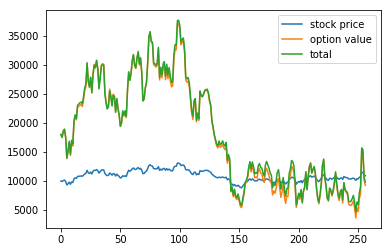

In [55]:
df1 = df[["stock price", "option value", "total"]]
df1.plot()
plt.show()

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


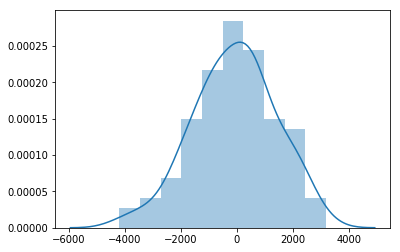

In [58]:
import seaborn as sns

N = 100
profits = np.zeros(N)
for i in iter(range(N)):
    S_vec, T_vec, sigma_vec = stockprice_simulation(S0, T, sigma, r, M)
    V_vec = NomialAmount * call_value(S_vec, T_vec, sigma_vec, r, K)
    D_vec = NomialAmount * call_delta(S_vec, T_vec, sigma_vec, r, K)
    df = deltahedge_backtest(S_vec, V_vec, D_vec, T_vec)
    profits[i] = df.profit.iloc[-1]

sns.distplot(profits)
plt.show()


C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


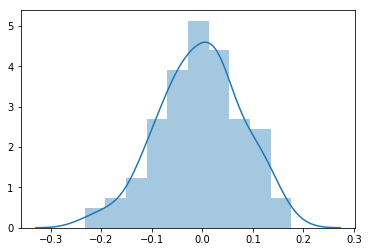

In [59]:
sns.distplot(profits/V_vec[0])
plt.show()

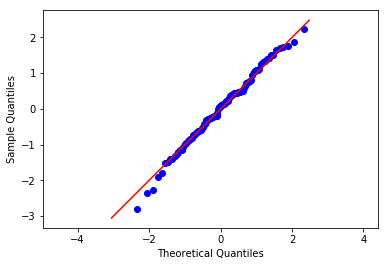

In [61]:
import statsmodels.api as sm

sm.qqplot(profits/V_vec[0], fit=True, line='45')
plt.axis("equal")
plt.show()

In [62]:
np.std(profits/V_vec[0])

0.08145413653091464

In [64]:
N = 100
profits = np.zeros(N)
for i in iter(range(N)):
    S_vec, T_vec, sigma_vec = stockprice_simulation(S0, T, sigma * 1.1, r, M)
    V_vec = NomialAmount * call_value(S_vec, T_vec, sigma_vec / 1.1, r, K)
    D_vec = NomialAmount * call_delta(S_vec, T_vec, sigma_vec / 1.1, r, K)
    df = deltahedge_backtest(S_vec, V_vec, D_vec, T_vec)
    profits[i] = df.profit.iloc[-1]

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [65]:
np.mean(profits)

-1808.67

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


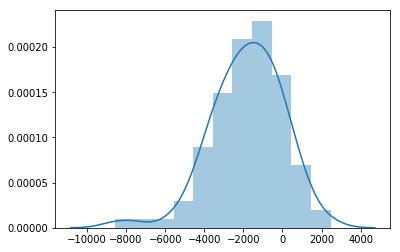

In [66]:
sns.distplot(profits)
plt.show()

In [67]:
def call_vega(S, T, sigma, r, K):
    if not hasattr(T, "__len__") and T == 0:
        return 0
    d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
    vega = S * sp.stats.norm.pdf(d1, 0, 1) * np.sqrt(T)
    return vega

In [68]:
call_vega(S0, T, 0.44, r, K) * NomialAmount * 0.04

1509.3803710996187